# Machine Learning avec Scipy

Scipy contient des modules tres puissants pour le machine learning, l'anayse de données, les time series, etc.
Ce notebook vous montre quelques unes des fonctions les plus utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Interpolation 1D
Interpoler un signal est parfois tres utile s'il vous manque des données dans un Dataset. Mais c'est une technique dangereuse, qui peut parfois transformer la réalité des choses !

### nuage de points de base

imaginons que l'on a 2 capteurs dont le 1er enregistre des informations toutes les 1 seconde et le 2eme toutes les 3 secondes.

on pourrait se dire que l'on a des valeurs gachées et qu'il faudrait enlever toutes les lignes Nan de notre dataset pour étudier nos capteurs ensemble ...

Mais on a aussi la solution d'utiliser des courbes d'interpolation pour tenter de récupérer les valeurs manquantes à notre 2eme capteur

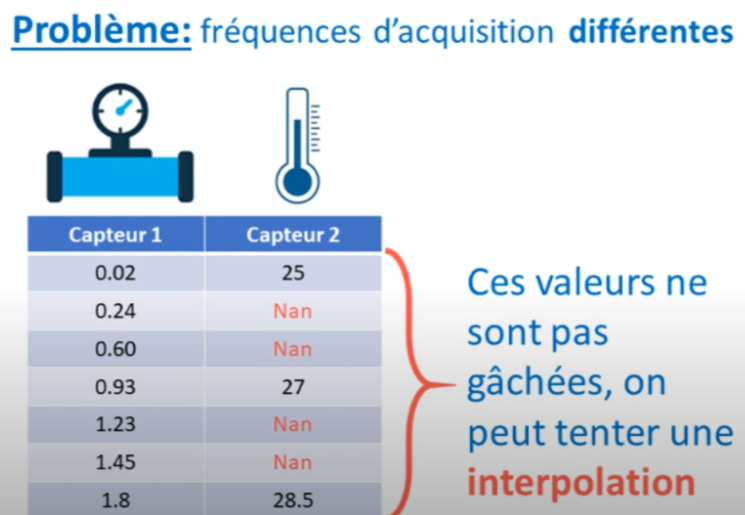

In [ ]:
# Création d'un Dataset
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

### Interpolation 1D

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
# création de la fonction interpolation f d'une dimension interp1d
f = interp1d(x, y, kind='linear')

# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 50)
result = f(new_x)

# visualisation avec matplotlib
plt.scatter(x, y)
plt.plot(new_x, result, c='r')

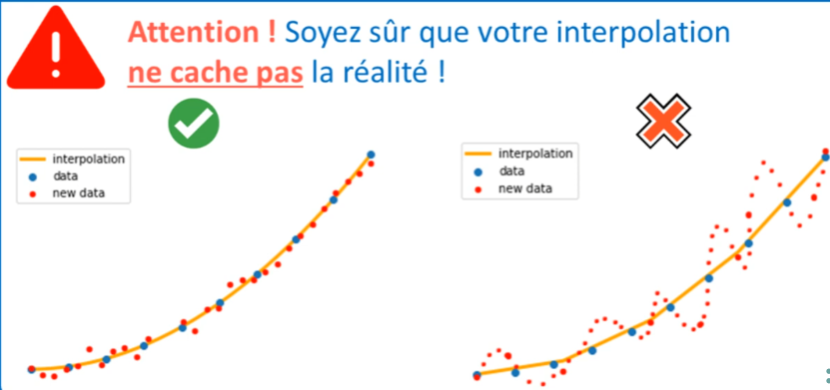

### A vous de faire maintenant !

In [ ]:
# Création d'un Dataset
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

In [ ]:
# création de la fonction interpolation f d'une dimension interp1d
f = interp1d(x, y, kind='linear')  # tester d'autres "kind" selon la documentation de scipy

# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 100)
result = f(new_x)

# visualisation avec matplotlib
plt.scatter(x, y)
plt.plot(new_x, result, c='r')

In [ ]:
f(1)

# 2) Optimisation

On trouve beaucoup de fonctions dans le module **optimize**. Certaines permettent de faire des minimisations locales, ou globales, d'autres permette de développer des modeles statistiques avec la méthode des moindres carrés. On trouve également des fonctions pour faire de la programmation linéaire.

### curve_fit

In [ ]:
# Création d'un Dataset avec du bruit "normal"
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [ ]:
x.shape

In [ ]:
# Définition d'un modele statistique sensé "coller" au dataset ci-dessus
def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [11]:
from scipy import optimize

In [ ]:
# curve_fit permet de trouver les parametres du modele f grace a la méthode des moindres carrés
params, param_cov = optimize.curve_fit(f, x, y)

In [ ]:
# Visualisation des résultats.
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

## Minimisation 1D
la fonction **optimize.minimize** est utile pour trouver un minimum local dans une fonction a N dimensions

In [ ]:
# Définition d'une fonction a 1 Dimension
def f (x):
    return x**2 + 15*np.sin(x)

In [ ]:
# Visualisation de la fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [ ]:
# Définition d'un point x0 (init) pour l'algorithme de minimisation
x0=-5
# a tester : optimize.minimize(f, x0=x0) # on voit le return x important qui est le minimum (local ou global selon x0)
result = optimize.minimize(f, x0=x0).x  # on récupère le return x ainsi
# résultat de la minimisation

In [ ]:
result = optimize.minimize(f, x0=x0)
print(result.x)  # Accéder à l'attribut 'x' pour avoir le point minimum
print(result.success)  # Vérifier si l'optimisation a réussi
print(result.message)  # Message détaillé sur la convergence de l'algorithme
# pour info ici le retunr result est un argument conteant plusieurs attributs d'où le point pour les récupérer (comme des objets)

In [ ]:
# Visualisation du résultat

plt.plot(x, f(x), lw=3, zorder=-1) # Courbe de la fonction
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1, label='initial') # point initial    zorder=1 courbe en avant, zorder=-1 en arrière
plt.scatter(result.x, f(result.x), s=100, c='r', zorder=1, label='final') # point final
plt.legend()
plt.show()

## Minimisation 2D

In [39]:
# courbe 2D déjà définie dans le cours matplotlib
# Définition d'une fonction 2D. X est un tableau numpy a 2-Dimension
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+ x[1])*np.cos(x[0])

C:\Users\user\AppData\Local\Temp\ipykernel_26900\3257264572.py:7: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contour(x, y, f(np.array([x, y])), level=100) # f(np.array([x, y])) retourne donc une grille de valeurs de la même dimension que x et y (100x100)


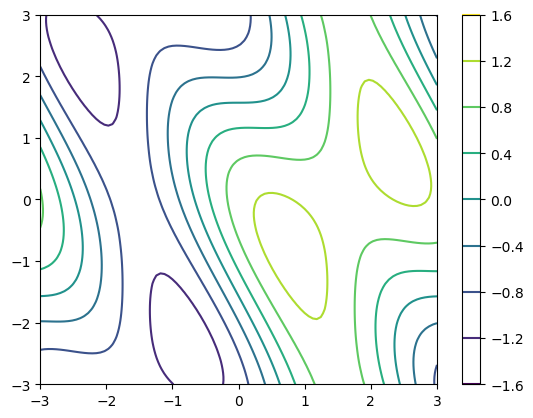

In [41]:
# Génération de la fonction sur un espace 2D.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

# Visualisation de la fonction
plt.contour(x, y, f(np.array([x, y])), level=100) # f(np.array([x, y])) retourne donc une grille de valeurs de la même dimension que x et y (100x100)
plt.colorbar()

le minimum est aux coordonées [-0.78539918 -2.3561934 ]


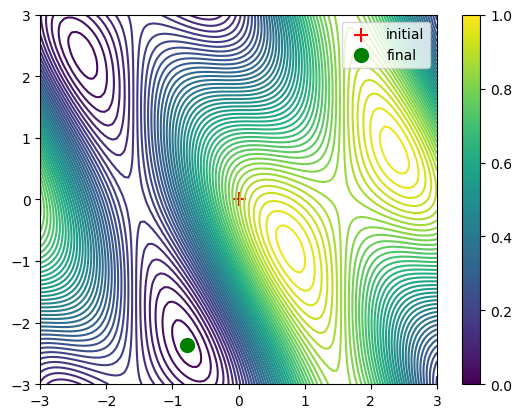

In [43]:
# Placement d'un point x0 initial aux coordonées (0,0)
x0 = np.zeros(2)  # [0, 0]

# Minimisation de la fonction
result = optimize.minimize(f, x0=x0).x
print('le minimum est aux coordonées', result) # imprimer le résultat

# Visualisation du résultat
plt.contour(x, y, f(np.array([x, y])), 50) # fonction 2D
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ
plt.scatter(result[0], result[1], c='g', s=100, label='final') # Point final
plt.legend()
plt.colorbar()
plt.show()

# 3) Traitement du signal

Le module **scipy.signal** contient beaucoup de fonctions de convolution et de filtres pour faire du traitement du signal. La fonction **signal.detrend** est parfaite pour éliminer une tendance linéaire dans un signal. Utile pour beaucoup d'applications !

Le module **scipy.fftpack** contient des fonctions tres puissantes et simples d'utilisation pour effectuer des transformations de Fourier

In [ ]:
# Création d'un Dataset avec une tendance linéaire
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)

In [ ]:
from scipy import signal

In [ ]:
# Élimination de la tendance linéaire y = ax + b avec detrend
new_y = signal.detrend(y)

# Visualisation des résultats
plt.plot(x, y, label='originel')
plt.plot(x, new_y, label='detrend')
plt.legend()
plt.show()

## Transformation de Fourier (FFT)
La transformation de Fourier est une technique mathématique puissante et normalement complexe a mettre en oeuvre. Heureusement **scipy.fftpack** rend cette technique tres simple a implémenter

La transformation de Fourier permet d'analyser les **fréquences** qui composent un signal **périodique** (qui se répete avec le temps). Cette opération produit un graphique que l'on appelle **Spectre**.

Une fois le **Spectre** généré, il est possible de filtrer les bruits indésirables, ou bien de sélectionner seulement certaines fréquences, ou d'en atténuer d'autres... les possibilités sont infinies.

Dans l'exemple que nous allons traiter, nous voyons comment filtrer un signal noyé dans du bruit.

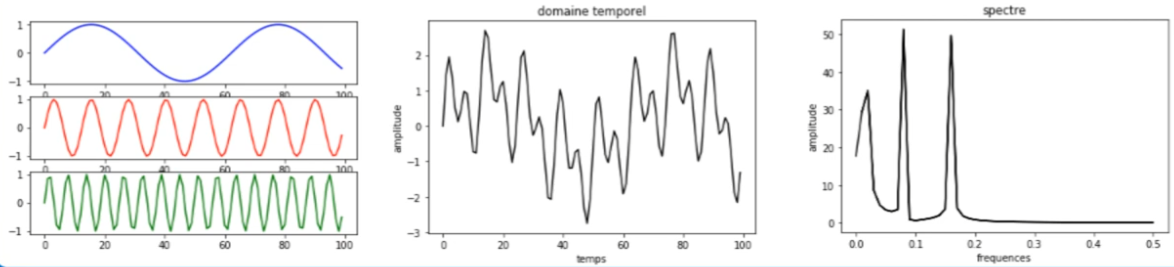

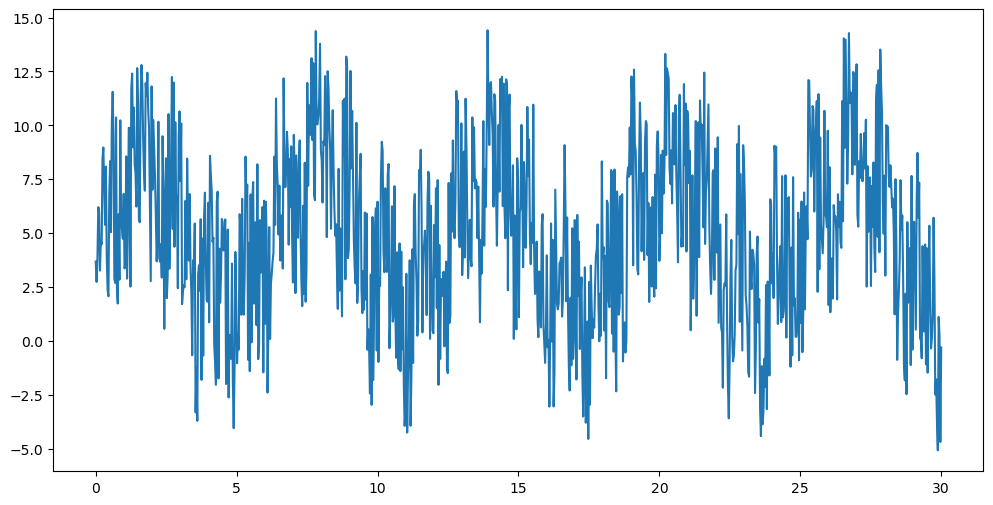

In [45]:
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.figure(figsize=(12, 6))
plt.plot(x, y)

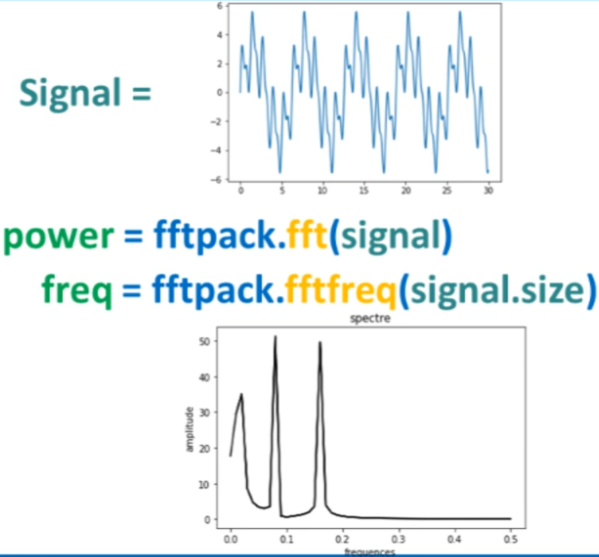

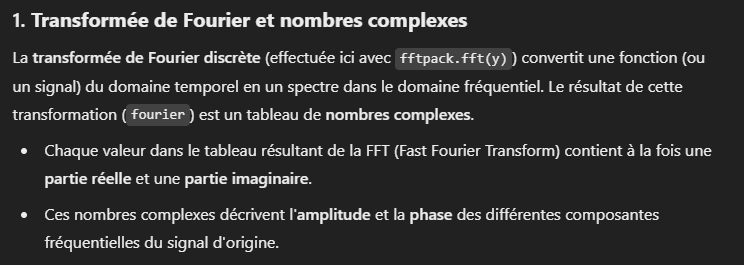

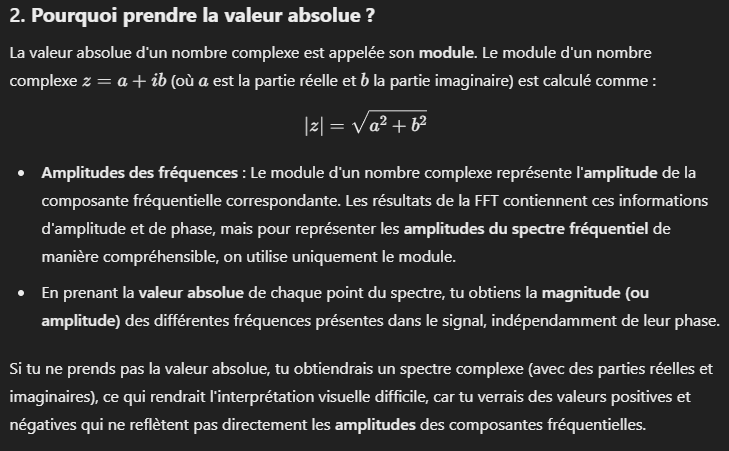

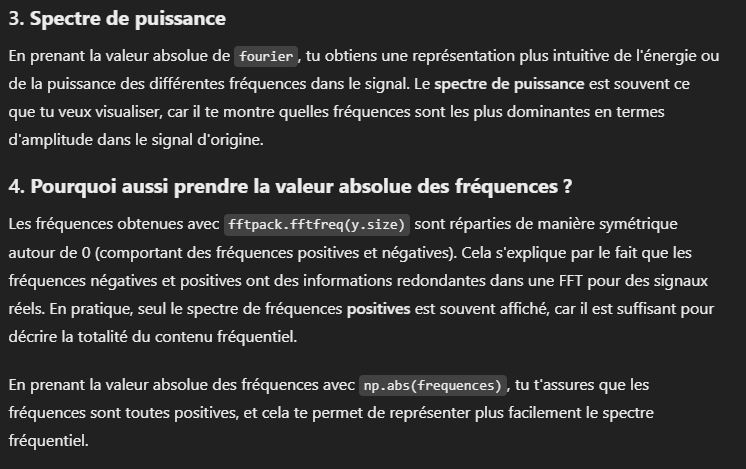

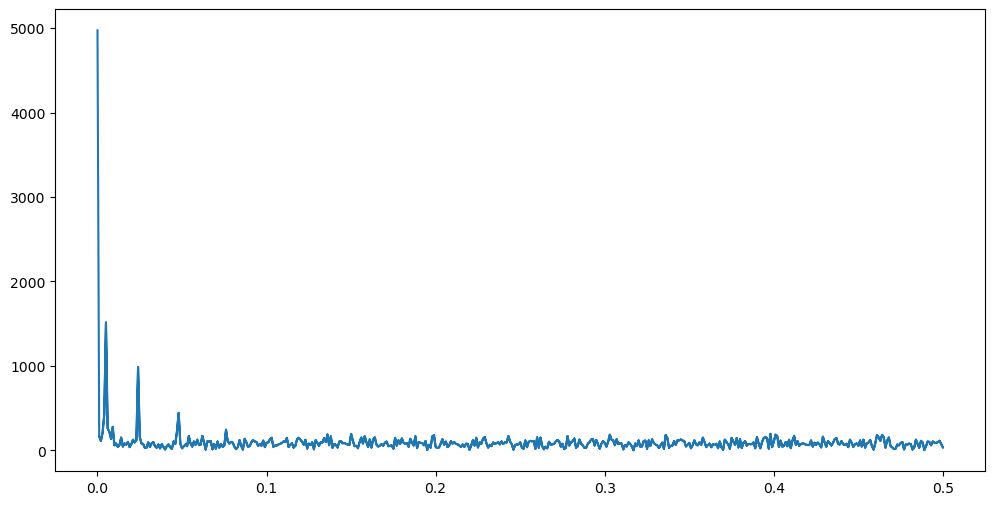

In [47]:
from scipy import fftpack

# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y) # fourier = notre spectre
power = np.abs(fourier) # la variable power est créée pour éliminer les amplitudes négatives
frequences = fftpack.fftfreq(y.size)
plt.figure(figsize=(12, 6))
plt.plot(np.abs(frequences), np.abs(fourier))

### Cela peut servir à filtrer le bruit d'un signal

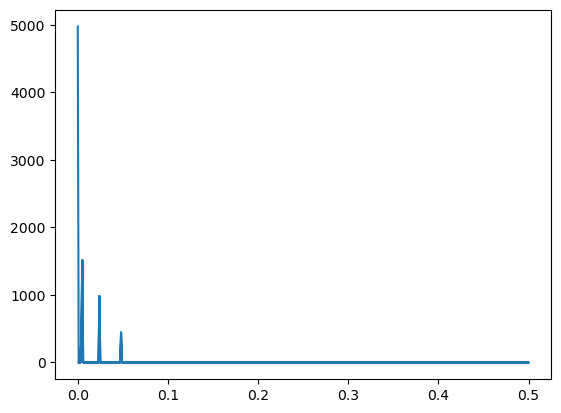

In [49]:
# filtre du spectre avec du boolean indexing de Numpy
fourier[power<400] = 0  # on réduit à 400 d'amplitude pour garder les 4 pics : tout ce qui est sous 400 devient 0

# Visualisation du spetre propre
plt.plot(np.abs(frequences), np.abs(fourier))

In [51]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

C:\Users\user\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\user\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


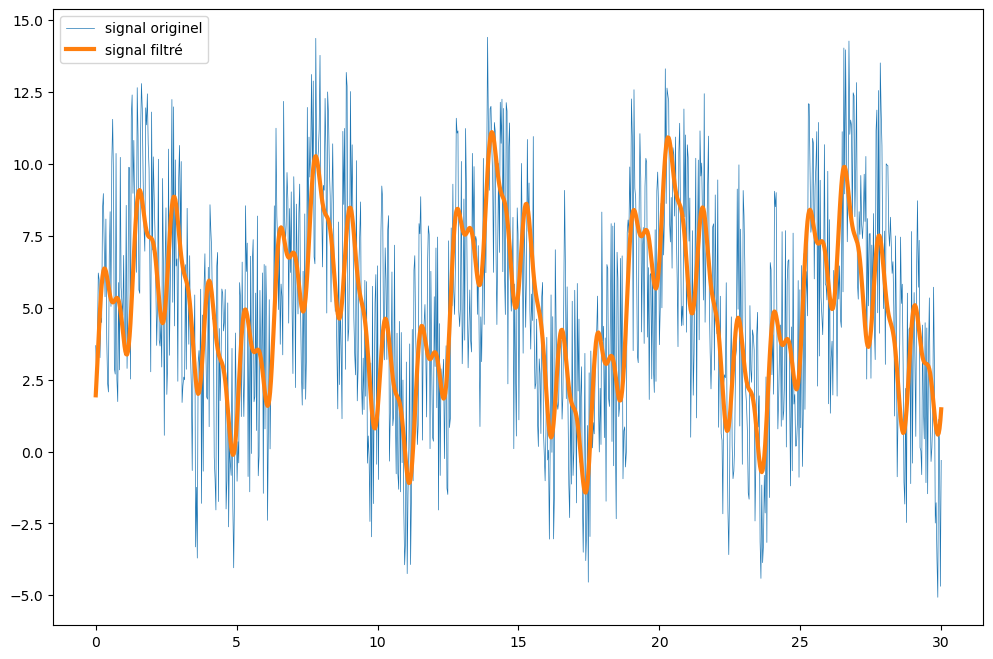

In [53]:
# Visualisation des résultats

plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()

# 4) image processing

**scipy.ndimage** propose de nombreuses actions pour le traitement d'images: convolutions, filtres de Gauss, méthode de mesures, et morphologie.

La morphologie est une technique qui permet de transformer une matrice (et donc une image) par le déplacement d'une structure sur chaque pixel de l'image. Lorsqu'un pixel "blanc" est visité, la structure peut effectuer une opération:
- de dilation: imprime des pixels
- d'érosion : efface des pixels

Cette technique peut-etre utile pour nettoyer une image des artefacts qui peuvent la composer.

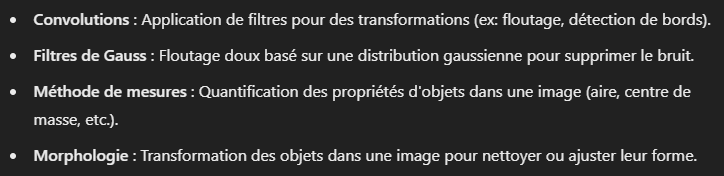
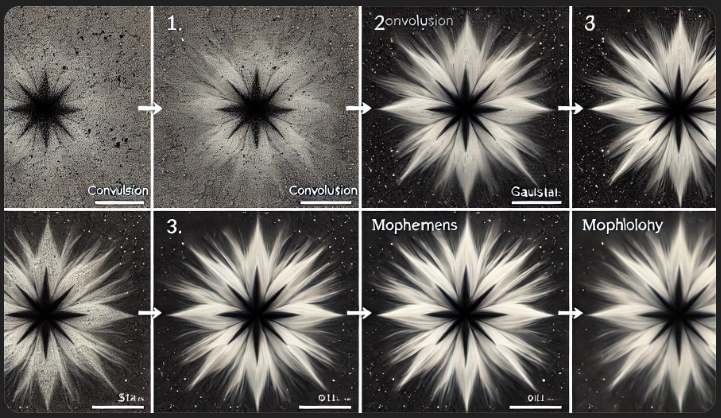

In [58]:
from scipy import ndimage

In [60]:
np.zeros((32, 32))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

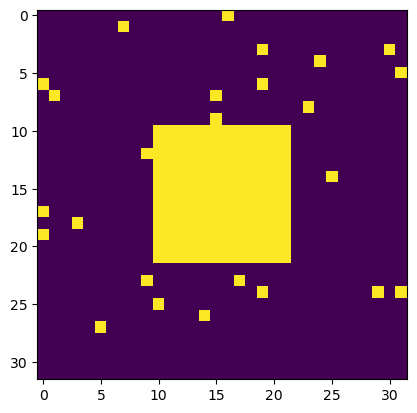

In [64]:
# Création d'une image avec quelques artefacts
np.random.seed(0) # on fixe une graine d'aléatoire commune à tous
X = np.zeros((32, 32)) # on fabrique une matrice de 0
X[10:-10, 10:-10] = 1 # on y ajoute un centre de 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1 # ajout d'artefacts aléatoires de 1
plt.imshow(X)

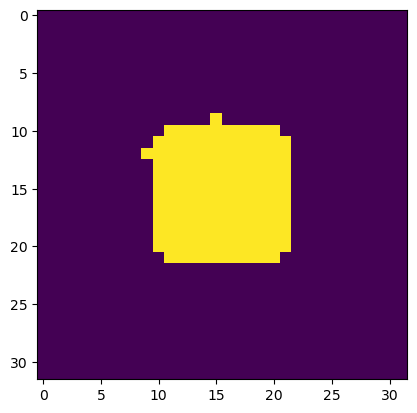

In [66]:
# opération de binary_opening = érosion puis dilation
open_X = ndimage.binary_opening(X)
plt.imshow(open_X)

# 5) Application : Image processing (cas réel)

On va essayer de réaliser 3 choses :
1. extraire les bactéries de l'arrière plan de l'image
2. utiliser les techniques de morphologie pour nettoyer les artéfacts de l'image
3. mesurer la taille des bactéries

In [82]:
# importer l'image avec pyplot
image = plt.imread('data/bacteria.png') 
image.shape

(507, 537, 3)

(507, 537)

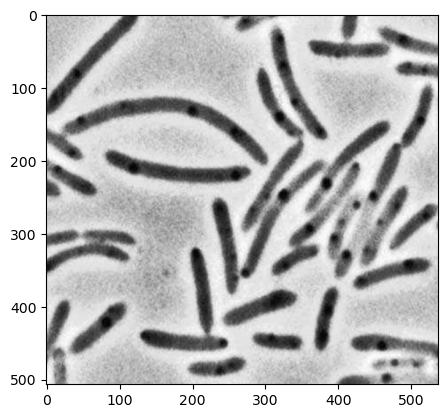

In [84]:
# image.shape donne ((507, 537, 3) donc 3D, nous on veux du 2 D (ici RVB)
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

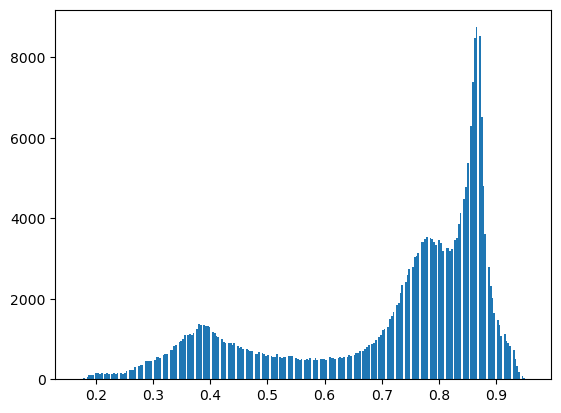

In [86]:
# copy de l'image, puis création d'un histogramme en aplatissant l'image par ravel
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255) # on aplatit l'image en une seule liste de point 1D => + facile à traiter qu'une matrice pour l'histogramme qui veut du 1D
plt.show() # permet de voir nos bactérie en gris-noir (pic 0.3 0.4) leur contour externer blanc (pic 0.85) et le reste en gris

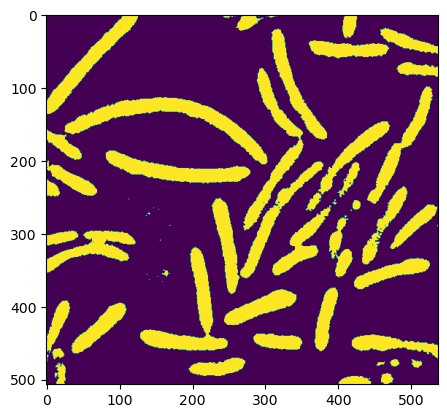

In [88]:
# boolean indexing: création d'une image binaire True ou False sur chaque pixel !
image = image<0.6 # on veut les bactérie donc extraire les pixels gris-noir soit <0.6 => faire image + entrée pour voir l'array bool

# Conversion de l'image binaire en float pour éviter l'erreur car imshow() ne supporte plus les tableaux booleenes
#image = image.astype(float)  # Convertir en float


plt.imshow(image)

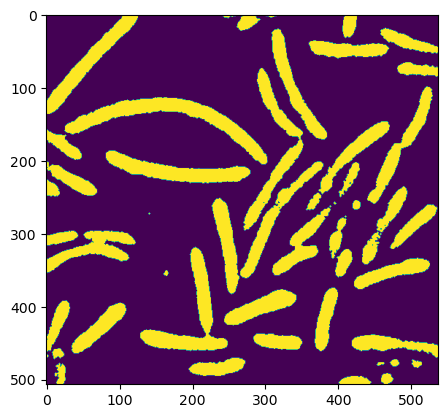

In [90]:
# on voit des artéfact présent (petits point jaune vers (150,300) qu'on veut éliminer avec la méthode vue précedemment

# morphologie utilisée pour enlever les artefacts
open_image = ndimage.binary_opening(image)  # voir bibliothèque scipy.ndimage >+ binary_openign fait une érosion et dilatation de l'image

# Conversion en float pour l'affichage avec imshow
#open_image = open_image.astype(float)

plt.imshow(open_image)

In [92]:
# compter et labeliser les motifs ou objets disctincts sur une image binaire

# Segmentation de l'image: label_image contient les différents labels et n_labels est le nombre de labels
label_image, n_labels = ndimage.label(open_image) # label_image = image étiquetés et n_labels = nbre d'étiquettes
print(f'il y a {n_labels} groupes')

il y a 53 groupes


In [96]:
label_image.shape

(507, 537)

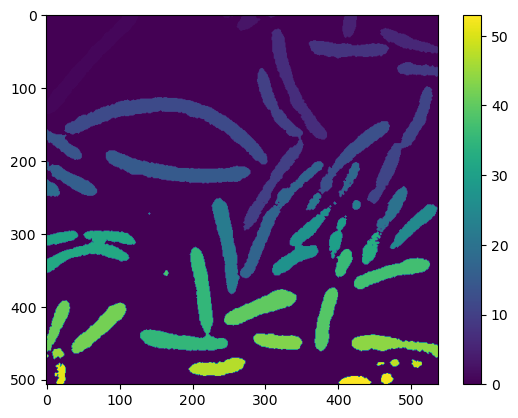

In [100]:
# Visualisation de l'image étiquetée
plt.imshow(label_image)
plt.colorbar()

In [102]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
sizes = ndimage.sum(open_image, label_image, range(n_labels))

In [104]:
sizes

array([0.000e+00, 3.321e+03, 7.500e+01, 4.620e+02, 5.800e+01, 5.220e+02,
       1.167e+03, 2.706e+03, 1.837e+03, 7.720e+02, 3.722e+03, 2.746e+03,
       5.733e+03, 2.060e+03, 8.600e+02, 3.820e+03, 1.222e+03, 2.733e+03,
       4.810e+02, 3.170e+02, 9.790e+02, 2.510e+02, 2.317e+03, 1.180e+02,
       1.000e+01, 1.218e+03, 5.000e+00, 2.176e+03, 5.000e+00, 5.000e+00,
       6.070e+02, 5.860e+02, 2.692e+03, 6.140e+02, 5.000e+00, 4.295e+03,
       5.880e+02, 1.849e+03, 3.600e+01, 1.498e+03, 2.183e+03, 1.006e+03,
       1.825e+03, 1.147e+03, 1.826e+03, 1.690e+02, 1.200e+01, 1.276e+03,
       9.400e+01, 1.070e+02, 3.700e+01, 3.010e+02, 1.900e+02])

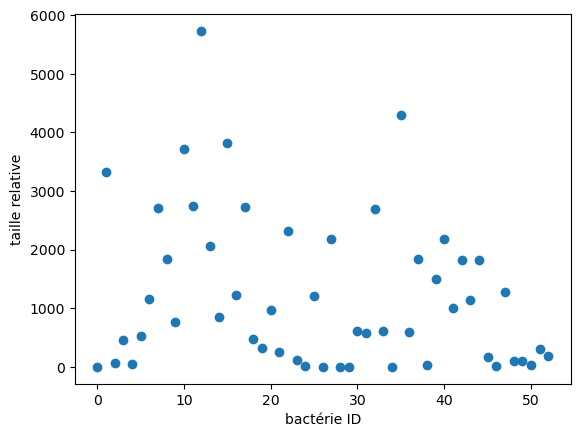

In [106]:
# Visualisation des résultats
plt.scatter(range(n_labels), sizes) # en x on fait un range sur n_labels et en y on met le array 1D "sizes"
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()

et à partir de la , boom, on a un dataset sur lequel on peut faire des stats (moyen, écart-type) faire du clustering etc...